In [2]:
!pip install pandas matplotlib seaborn openpyxl



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd  


air_quality = pd.read_excel("airquality2004.xlsx")  
forest_cover = pd.read_excel("District-wise_forest_cover_-_Uttarakhand.xlsx")  
land_use = pd.read_excel("Land_use_pattern_-_Uttarakhand.xlsx")  

 
air_quality.head(), forest_cover.head(), land_use.head()


(  Sampling Date        State City/Town/Village/Area  \
 0    2004-02-01  Uttarakhand               Dehradun   
 1    2004-08-01  Uttarakhand               Dehradun   
 2    2004-12-01  Uttarakhand               Dehradun   
 3    2004-01-15  Uttarakhand               Dehradun   
 4    2004-01-19  Uttarakhand               Dehradun   
 
                                               Agency  \
 0  Uttarakhand Environment Protection and Polluti...   
 1  Uttarakhand Environment Protection and Polluti...   
 2  Uttarakhand Environment Protection and Polluti...   
 3  Uttarakhand Environment Protection and Polluti...   
 4  Uttarakhand Environment Protection and Polluti...   
 
                      Type of Location   SO2   NO2  RSPM/PM10    SPM  
 0  Residential, Rural and other Areas  17.0  21.0      152.0  265.0  
 1  Residential, Rural and other Areas  18.0  24.0      184.0  388.0  
 2  Residential, Rural and other Areas  20.0  24.0      182.0  374.0  
 3  Residential, Rural and other A

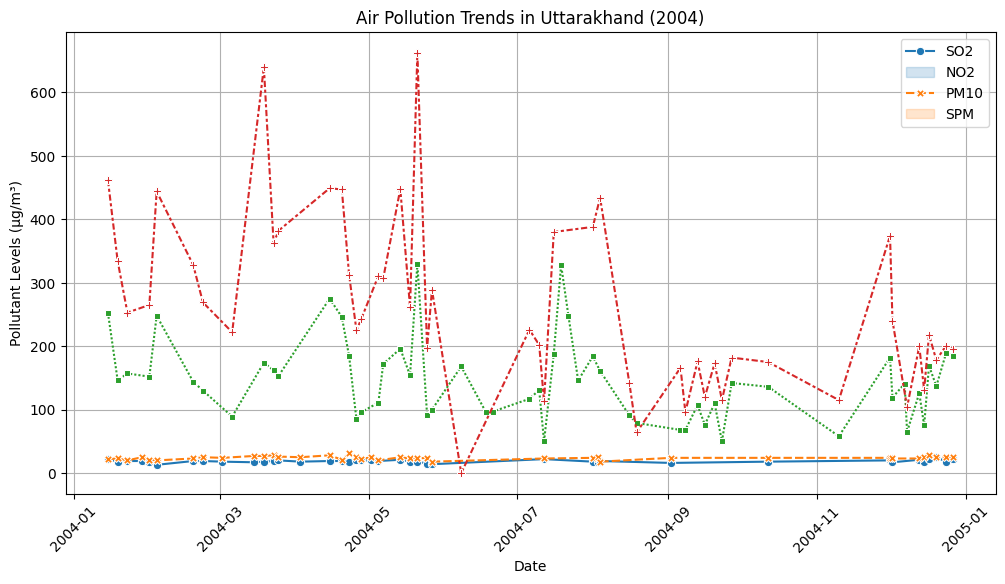

In [4]:
import matplotlib.pyplot as plt  
import seaborn as sns  
 
air_quality["Sampling Date"] = pd.to_datetime(air_quality["Sampling Date"])  

 
pollution_trends = air_quality.groupby("Sampling Date")[["SO2", "NO2", "RSPM/PM10", "SPM"]].mean()  


plt.figure(figsize=(12, 6))  
sns.lineplot(data=pollution_trends, markers=True)  
plt.title("Air Pollution Trends in Uttarakhand (2004)")  
plt.xlabel("Date")  
plt.ylabel("Pollutant Levels (µg/m³)")  
plt.legend(["SO2", "NO2", "PM10", "SPM"])  
plt.xticks(rotation=45)  
plt.grid()  
plt.show()


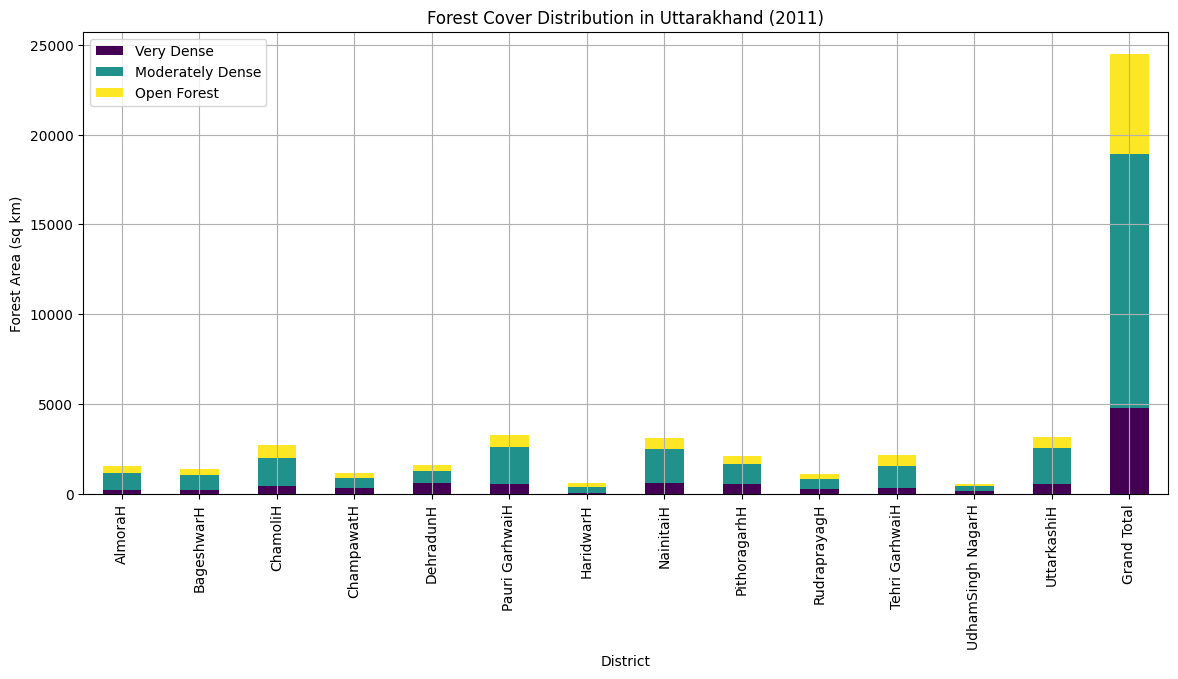

In [5]:
  
forest_cover_plot = forest_cover[["District", "2011 Assessment - Very Dense Forest",  
                                  "2011 Assessment - Mod. Dense Forest",  
                                  "2011 Assessment - Open Forest"]]  

forest_cover_plot.set_index("District", inplace=True)  


forest_cover_plot.plot(kind="bar", stacked=True, colormap="viridis", figsize=(14, 6))  
plt.title("Forest Cover Distribution in Uttarakhand (2011)")  
plt.xlabel("District")  
plt.ylabel("Forest Area (sq km)")  
plt.legend(["Very Dense", "Moderately Dense", "Open Forest"])  
plt.xticks(rotation=90)  
plt.grid()  
plt.show()


C:\Users\tusha\AppData\Local\Temp\ipykernel_24360\4245030399.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=land_use_plot["Land Use Category"], x=land_use_plot["Percentage"], palette="coolwarm")


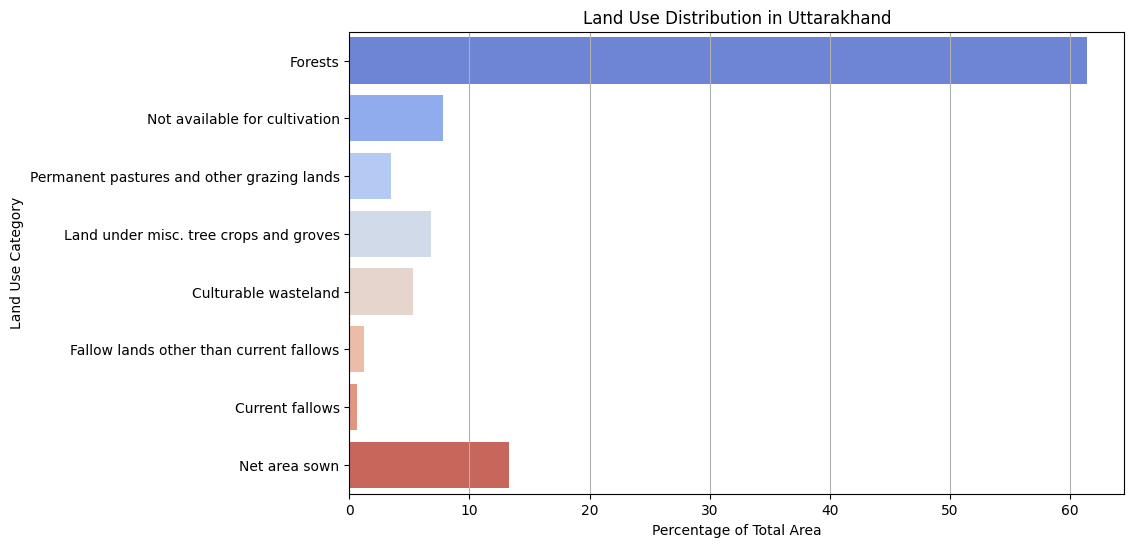

In [6]:

land_use_plot = land_use.iloc[2:, :]  
land_use_plot.columns = ["Land Use Category", "Area (in thousands ha)", "Percentage"]  

 
plt.figure(figsize=(10, 6))  
sns.barplot(y=land_use_plot["Land Use Category"], x=land_use_plot["Percentage"], palette="coolwarm")  
plt.title("Land Use Distribution in Uttarakhand")  
plt.xlabel("Percentage of Total Area")  
plt.ylabel("Land Use Category")  
plt.grid(axis="x")  
plt.show()


C:\Users\tusha\AppData\Local\Temp\ipykernel_24360\2398150021.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=water_body_count["District Name"], x=water_body_count["si_no_of_water_body_within_village_town"], palette="Blues_r")


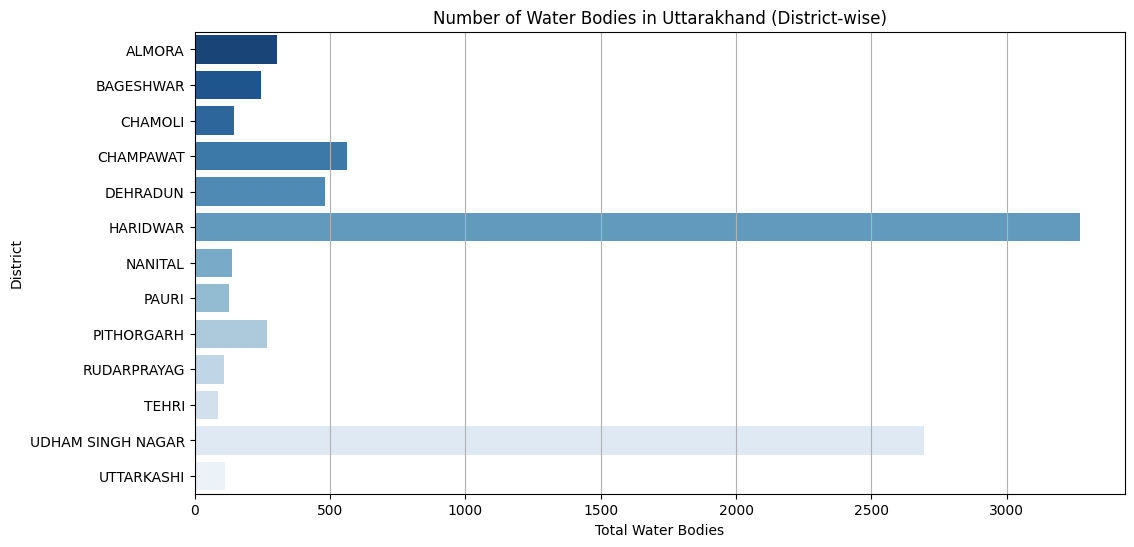

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


water_resources = pd.read_excel("waterbodies.xlsx")


water_body_count = water_resources.groupby("District Name")["si_no_of_water_body_within_village_town"].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(y=water_body_count["District Name"], x=water_body_count["si_no_of_water_body_within_village_town"], palette="Blues_r")
plt.xlabel("Total Water Bodies")
plt.ylabel("District")
plt.title("Number of Water Bodies in Uttarakhand (District-wise)")
plt.grid(axis="x")

# Save Plot
plt.savefig("water_resources.png")
plt.show()


C:\Users\tusha\AppData\Local\Temp\ipykernel_24360\2552287629.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=irrigation["Name of District"], x=irrigation["No of Schemes"], palette="Greens_r")


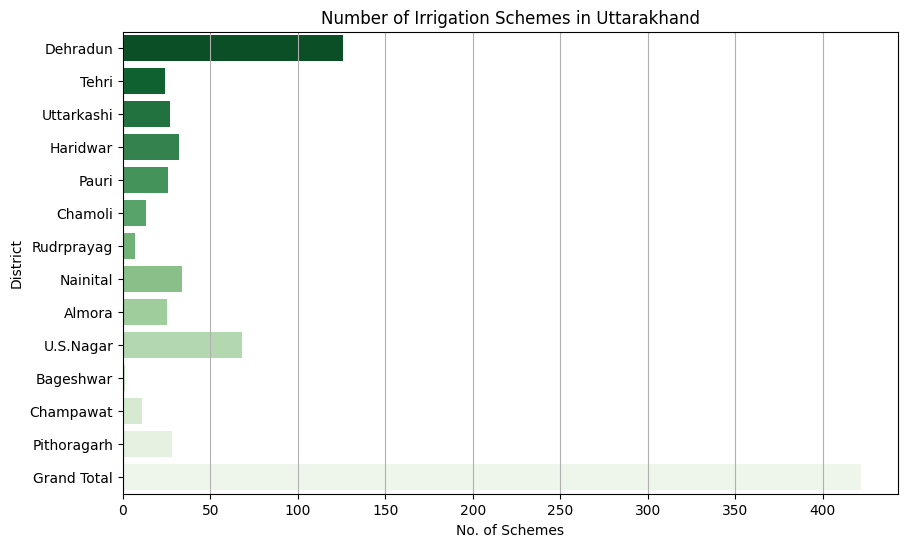

In [9]:

irrigation = pd.read_excel("irrigation.xlsx")


plt.figure(figsize=(10, 6))
sns.barplot(y=irrigation["Name of District"], x=irrigation["No of Schemes"], palette="Greens_r")
plt.xlabel("No. of Schemes")
plt.ylabel("District")
plt.title("Number of Irrigation Schemes in Uttarakhand")
plt.grid(axis="x")


plt.savefig("irrigation_schemes.png")
plt.show()


Available columns: Index(['Year', 'Description', 'Almora', 'Bageshwar', 'Chamoli', 'Champawat',
       'Dehradin', 'Garhwal', 'Hardwar', 'Nainital', 'Pithoragarh',
       'Rudraprayag', 'Tehri Garhwal', 'Udham Singh Nagar', 'Uttarkashi'],
      dtype='object')


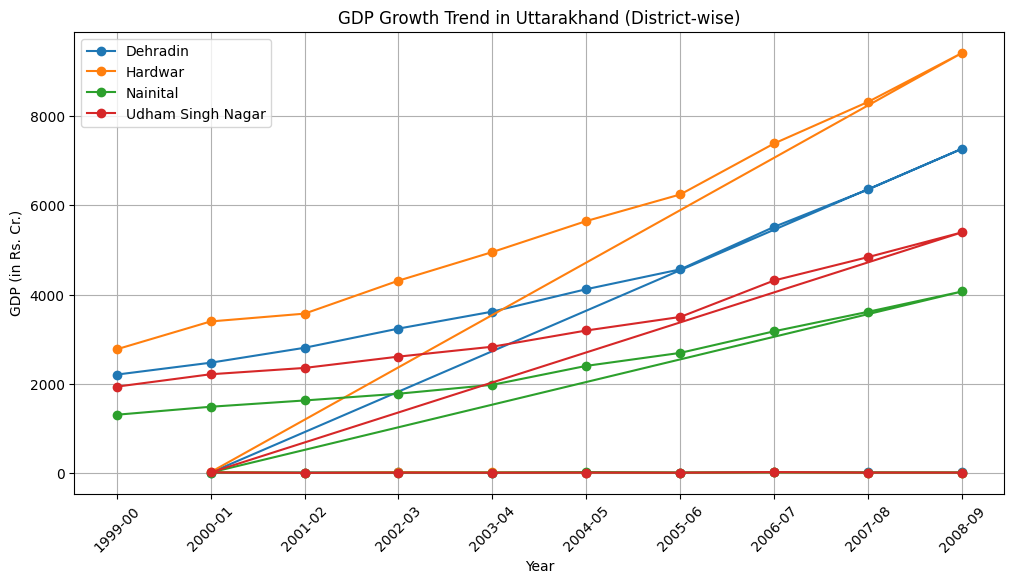

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


gdp_data = pd.read_excel("Districtwise_GDP_and_growth_rate_of_Uttarakhnad_based_at_current_price_1999-00.xlsx")


print("Available columns:", gdp_data.columns)


gdp_data["Year"] = gdp_data["Year"].astype(str)


selected_districts = ["Dehradin", "Hardwar", "Nainital", "Udham Singh Nagar"]


for district in selected_districts:
    if district not in gdp_data.columns:
        print(f"❌ Error: Column '{district}' not found. Check column names!")


plt.figure(figsize=(12, 6))
for district in selected_districts:
    if district in gdp_data.columns:
        plt.plot(gdp_data["Year"], gdp_data[district], marker="o", label=district)

plt.xlabel("Year")
plt.ylabel("GDP (in Rs. Cr.)")
plt.title("GDP Growth Trend in Uttarakhand (District-wise)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

# Show plot
plt.show()


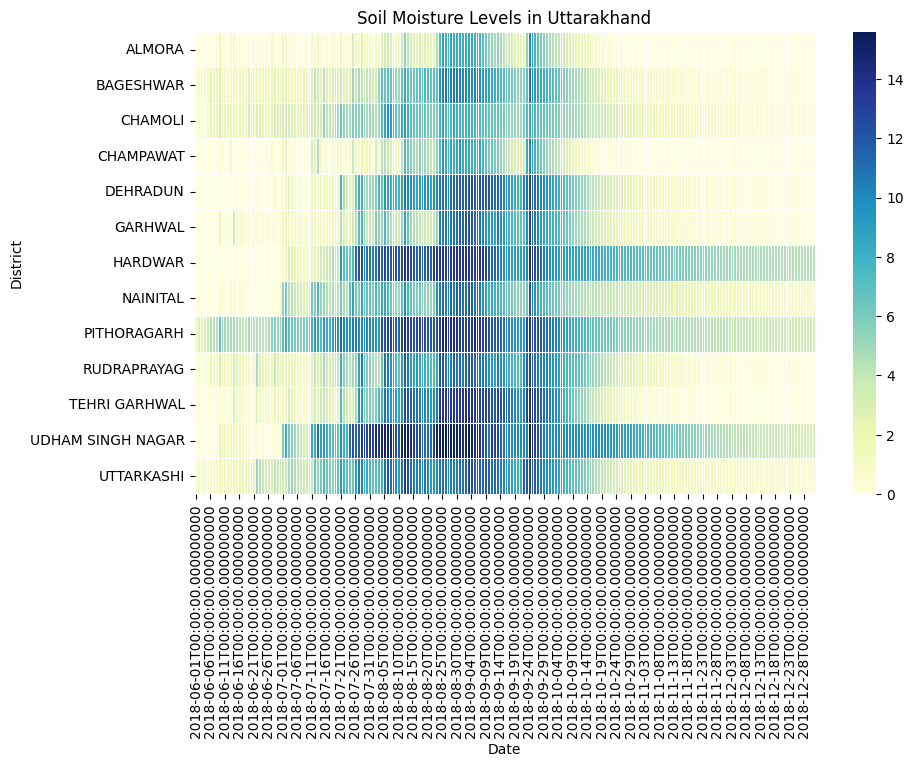

In [15]:

soil_moisture = pd.read_excel("Soilmoisture.xlsx")


plt.figure(figsize=(10, 6))
soil_pivot = soil_moisture.pivot(index="DistrictName", columns="Date", values="Average Soilmoisture Level (at 15cm)")
sns.heatmap(soil_pivot, cmap="YlGnBu", linewidths=0.5)

plt.title("Soil Moisture Levels in Uttarakhand")
plt.xlabel("Date")
plt.ylabel("District")


plt.savefig("soil_moisture_heatmap.png")
plt.show()


❌ Error: Columns not found. Please check your dataset structure again.


In [22]:
import pandas as pd


air_quality_data = {
    "Date": ["2023-01-01", "2023-02-01", "2023-03-01"],
    "City": ["Dehradun", "Haridwar", "Nainital"],
    "SO2": [15, 20, 18],
    "NO2": [30, 25, 27],
    "PM10": [120, 140, 110]
}
air_quality_df = pd.DataFrame(air_quality_data)
air_quality_df.to_excel("Air_Quality_Sample.xlsx", index=False)


forest_cover_data = {
    "District": ["Dehradun", "Nainital", "Haridwar"],
    "Dense Forest (sq km)": [500, 450, 300],
    "Open Forest (sq km)": [200, 180, 150]
}
forest_cover_df = pd.DataFrame(forest_cover_data)
forest_cover_df.to_excel("Forest_Cover_Sample.xlsx", index=False)


land_use_data = {
    "Category": ["Forest", "Agriculture", "Urban"],
    "Area (sq km)": [5000, 3000, 2000]
}
land_use_df = pd.DataFrame(land_use_data)
land_use_df.to_excel("Land_Use_Sample.xlsx", index=False)


water_resources_data = {
    "District": ["Dehradun", "Nainital", "Haridwar"],
    "Lakes": [10, 8, 12],
    "Rivers": [5, 3, 7],
    "Groundwater Storage (ML)": [5000, 4000, 6000]
}
water_resources_df = pd.DataFrame(water_resources_data)
water_resources_df.to_excel("Water_Resources_Sample.xlsx", index=False)

print("✅ Sample Excel files created successfully!")


✅ Sample Excel files created successfully!


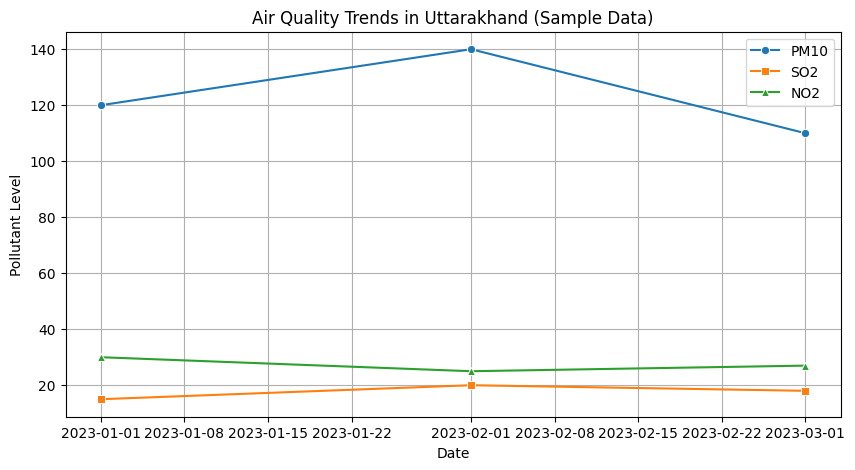

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime format
air_quality_df["Date"] = pd.to_datetime(air_quality_df["Date"])

# Plot pollution trends
plt.figure(figsize=(10, 5))
sns.lineplot(x="Date", y="PM10", data=air_quality_df, marker="o", label="PM10")
sns.lineplot(x="Date", y="SO2", data=air_quality_df, marker="s", label="SO2")
sns.lineplot(x="Date", y="NO2", data=air_quality_df, marker="^", label="NO2")

plt.xlabel("Date")
plt.ylabel("Pollutant Level")
plt.title("Air Quality Trends in Uttarakhand (Sample Data)")
plt.legend()
plt.grid()

# Show Plot
plt.show()
